In [ ]:
# Import necessary libraries
import json
import pandas as pd

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For Colab files
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
business_filepath = "./yelp_academic_dataset_business.json"
review_filepath = "./yelp_academic_dataset_review.json"
user_filepath = "./yelp_academic_dataset_user.json"

### Prepare Restaurant Data

In [ ]:
# Generator function for businesses
def load_businesses(file_path):
    with open(file_path, 'r', encoding='utf-8') as data_file:
        for line in data_file:
            business_info = json.loads(line)
            yield business_info

business_raw = pd.DataFrame(load_businesses(business_filepath))

In [ ]:
# Preview business data
business_raw.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
PA_mask = business_raw['state'] == 'PA'
restaurants_mask = business_raw['categories'].notna() & business_raw['categories'].str.contains('Restaurants')

In [ ]:
restaurants = business_raw[PA_mask & restaurants_mask]
restaurants.reset_index(drop=True, inplace=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [ ]:
restaurants.shape

(12641, 14)

In [ ]:
restaurants.isna().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       106
categories         0
hours           1961
dtype: int64

In [ ]:
# Standardize city names
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.strip())
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.title())

In [ ]:
# Confirm addresses of restaurants with unspecified city names
restaurants[restaurants['city'] == 'Pennsylvania']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7245,2SDa9Vc7opPT1WicNIkVXw,Texas Chicken & Burgers,"3960-80 Kensington Ave, Philadelphia",Pennsylvania,PA,19124,40.006140,-75.096110,2.0,5,1,"{'Alcohol': ''none'', 'HasTV': 'True', 'Ambien...","Restaurants, Burgers, American (Traditional), ...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
11116,DcLUToAT66NboaJPrH9jCg,Lucky 7 Deli & Fried Chicken,255 Horsham Rd,Pennsylvania,PA,19044,40.144801,-75.122405,4.0,23,0,"{'RestaurantsDelivery': 'False', 'HasTV': 'Fal...","Restaurants, Delis, Sandwiches","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ..."


In [ ]:
def correct_city_names(name):
    match name:
        case 'Abington':
            return 'Abington Township'
        case 'Bensalem' | 'Bensalem. Pa':
            return 'Bensalem Township'
        case 'Bethel':
            return 'Bethel Township'
        case 'Bristol' | 'Bristol Twp':
            return 'Bristol Township'
        case 'Charlotte':
            return 'Philadelphia'
        case 'Cheltenham':
            return 'Cheltenham Township'
        case 'Conshohoeken':
            return 'Conshohocken'
        case 'E. Norristown':
            return 'Norristown'
        case 'Festerville':
            return 'Feasterville'
        case 'Feasterville Trevose':
            return 'Feasterville-Trevose'
        case 'Fox Street' | 'Pennsylvania' | 'Phila' | 'Philadephia' | 'Philly' | 'Southwest Philadelphia':
            return 'Philadelphia'
        case 'Glenoldan':
            return 'Glenolden'
        case 'N.Wales':
            return 'North Wales'
        case 'Newtown' | 'Newtown Sqaure' | 'Newtown Square':
            return 'Newtown Township'
        case 'St. Davids':
            return 'Saint Davids'
        case 'W.Chester' | 'West Chester Pa':
            return 'West Chester'
        case 'Warrington':
            return 'Warrington Township'
        case _:
            return name

In [ ]:
restaurants.loc[:, 'city'] = restaurants['city'].apply(correct_city_names)
restaurants.loc[11116, 'city'] = 'Hatboro'

In [ ]:
# sorted(restaurants['city'].unique())

In [ ]:
def categories_to_list(categories):
    if categories is None:
        return []
    items = categories.split(", ")
    cat_list = [i for i in items]
    return cat_list

In [ ]:
restaurants.loc[:, 'categories'] = restaurants['categories'].apply(categories_to_list)

In [ ]:
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","[Sushi Bars, Restaurants, Japanese]","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","[Korean, Restaurants]","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","[Cocktail Bars, Bars, Italian, Nightlife, Rest...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","[Pizza, Restaurants, Salad, Soup]","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [ ]:
restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
restaurants.describe()

,latitude,longitude,stars,review_count,is_open
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,40.040374,-75.231329,3.521557,83.925797,0.638320
std,0.121069,0.182647,0.796247,175.751601,0.480506
min,39.795125,-75.798695,1.000000,5.000000,0.000000
25%,39.950102,-75.317770,3.000000,14.000000,0.000000
50%,40.006335,-75.175753,3.500000,34.000000,1.000000
75%,40.120194,-75.143226,4.000000,86.000000,1.000000
max,40.449748,-74.772131,5.000000,5721.000000,1.000000


In [ ]:
restaurants.shape

(12641, 14)

In [ ]:
# Maintain set of restaurant business_ids to prune reviews
restaurant_ids = set(restaurants['business_id'])

### Exploring Restaurant Data

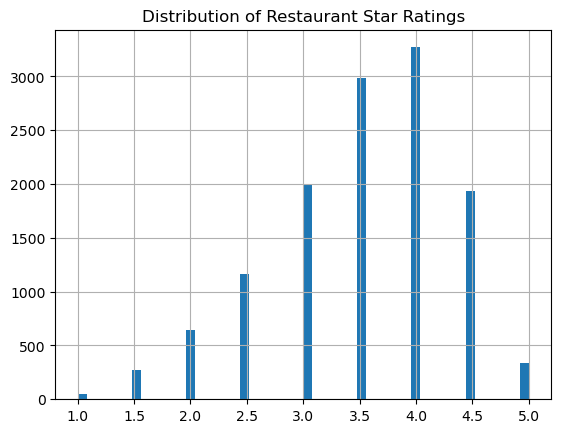

In [ ]:
restaurants['stars'].hist(bins=50)
plt.title("Distribution of Restaurant Star Ratings")
plt.show()

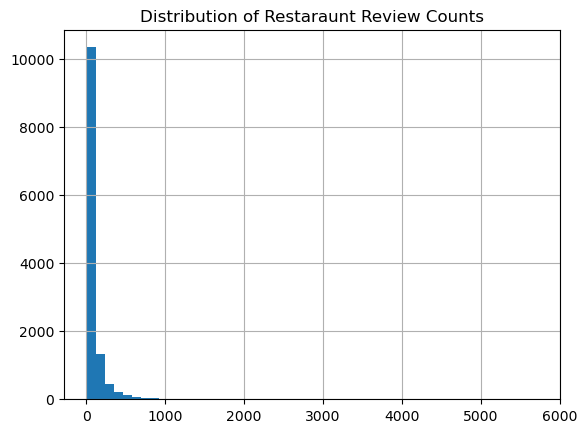

In [ ]:
restaurants['review_count'].hist(bins=50)
plt.title("Distribution of Restaraunt Review Counts")
plt.show()

In [ ]:
restaurants['review_count'].value_counts()[:10]

review_count
5     527
6     423
7     381
8     345
10    334
9     324
11    273
14    251
12    248
13    236
Name: count, dtype: int64

In [ ]:
from collections import Counter

category_counts = Counter()

_ = restaurants['categories'].apply(lambda x: category_counts.update(x))

In [ ]:
# Retrieve the top 21 categories and remove the top category
# (which will be Restaurants)
top_20_categories = category_counts.most_common(21)
del top_20_categories[0]

top_20_categories

[('Food', 3851),
 ('Sandwiches', 2151),
 ('Pizza', 2128),
 ('Nightlife', 1936),
 ('Bars', 1854),
 ('American (Traditional)', 1779),
 ('American (New)', 1539),
 ('Italian', 1433),
 ('Breakfast & Brunch', 1425),
 ('Coffee & Tea', 1124),
 ('Burgers', 983),
 ('Chinese', 918),
 ('Fast Food', 915),
 ('Event Planning & Services', 795),
 ('Seafood', 767),
 ('Mexican', 714),
 ('Delis', 708),
 ('Salad', 678),
 ('Cafes', 653),
 ('Caterers', 530)]

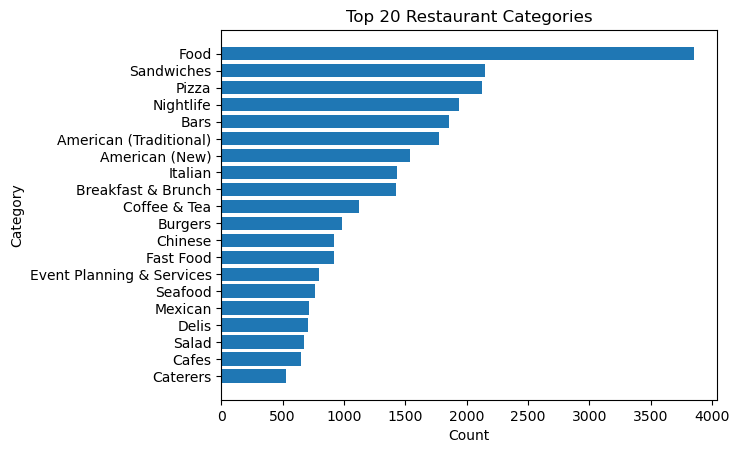

In [ ]:
cat_bar_x = [x[1] for x in top_20_categories[::-1]]
cat_bar_y = [x[0] for x in top_20_categories[::-1]]

plt.barh(cat_bar_y, cat_bar_x)
plt.ylabel("Category")
plt.xlabel("Count")
plt.title("Top 20 Restaurant Categories")
plt.show()

Create KML files to plot latitude and longitude of restaurants on a map. These can be later viewed in Google Maps.

In [ ]:
import os
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

if os.path.exists("restaurants_1.kml"):
    print("The restaurants KML file(s) already exist(s).")
else:
    # Convert the DataFrame to a GeoDataFrame
    geometry = [Point(xy) for xy in zip(restaurants['longitude'], restaurants['latitude'])]
    gdf = gpd.GeoDataFrame(restaurants, geometry=geometry, crs='EPSG:4326')

    # Split the full GeoDataFrame into smaller chunks to import on Google Maps
    num_splits = int(np.ceil(gdf.memory_usage(index=True, deep=True).sum() / (5 * 1024 * 1024)))

    chunks = np.array_split(gdf, num_splits)

    for i, chunk in enumerate(chunks):
        chunk.to_file(f'restaurants_{i+1}.kml', driver='KML')

The restaurants KML file(s) already exist(s).


### Prepare Restaurant Reviews

In [ ]:
# Generator function for filtered reviews
def load_filtered_reviews(file_path, restaurant_ids):
    with open(file_path, 'r', encoding='utf-8') as data_file:
        for line in data_file:
            review_info = json.loads(line)
            if review_info['business_id'] in restaurant_ids:
                yield review_info

# Convert the filtered data into a DataFrame
review_raw = pd.DataFrame(load_filtered_reviews(review_filepath, restaurant_ids))

In [ ]:
# Preview review data
review_raw.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14


In [ ]:
review_raw.shape

(1100250, 9)

In [ ]:
# Maintain set of user_ids to prune user data
user_ids = set(review_raw['user_id'])

In [ ]:
review_raw.describe()

,stars,useful,funny,cool
count,1.100250e+06,1.100250e+06,1.100250e+06,1.100250e+06
mean,3.745291e+00,1.081819e+00,3.468666e-01,4.873910e-01
std,1.367894e+00,2.472114e+00,1.376099e+00,1.777101e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.240000e+02,2.270000e+02,1.630000e+02


In [ ]:
review_raw.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
review_raw['date'] = pd.to_datetime(review_raw['date']).dt.date

In [ ]:
review_raw.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14


#### Text Pre-processing

In [ ]:
import re

review_raw['text'].dropna(inplace=True)
reviews_processed = review_raw.copy()
reviews_processed['text'] = reviews_processed['text'].replace(r'[^\w\s]', ' ', regex=True)
reviews_processed['text'] = reviews_processed['text'].str.lower()
reviews_processed.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,if you decide to eat here just be aware it is...,2018-07-07
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,wow yummy different delicious our favo...,2015-01-04
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,i am a long term frequent customer of this est...,2015-09-23
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,amazingly amazing wings and homemade bleu chee...,2015-08-07
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,good food loved the gnocchi with marinara\nth...,2009-10-14


Removing stop words:

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayagozsmagulova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

reviews_processed['text'] = reviews_processed['text'].apply(remove_stopwords)
reviews_processed.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,decide eat aware going take 2 hours beginning ...,2018-07-07
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,wow yummy different delicious favorite lamb cu...,2015-01-04
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,long term frequent customer establishment went...,2015-09-23
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,amazingly amazing wings homemade bleu cheese r...,2015-08-07
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,good food loved gnocchi marinara baked eggplan...,2009-10-14


### Exploring Review Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

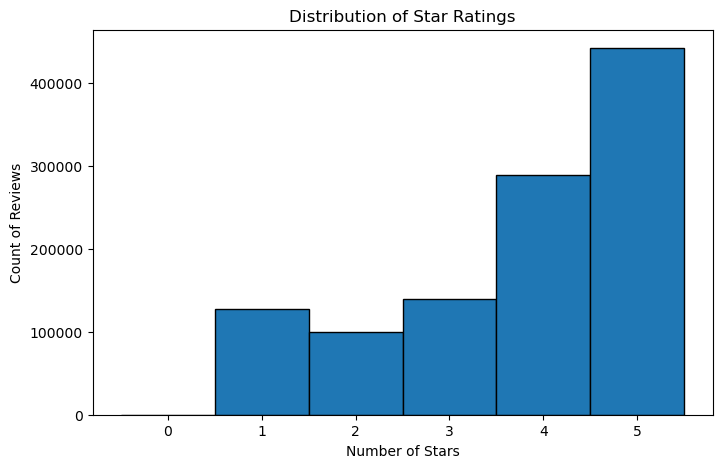

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(review_raw['stars'], bins=np.arange(7)-0.5, align='mid', ec='black')
plt.xticks([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('Distribution of Star Ratings')
plt.xlabel('Number of Stars')
plt.ylabel('Count of Reviews')
plt.show()

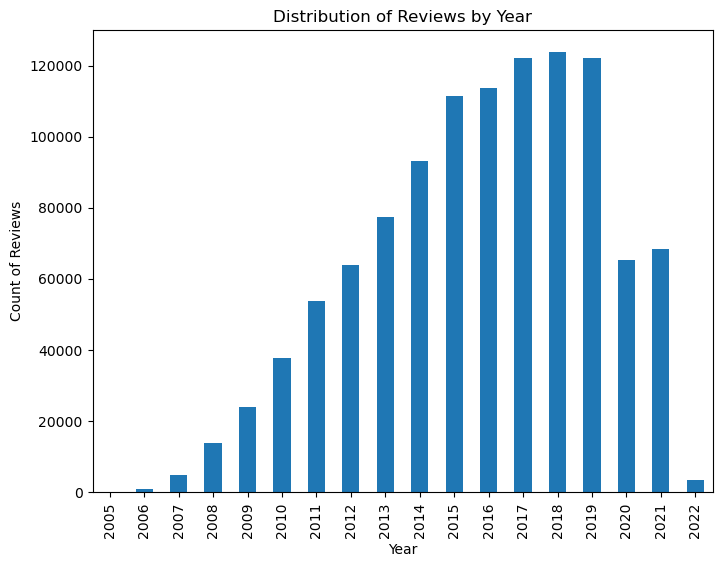

In [ ]:
plt.figure(figsize=(8, 6))
review_raw['review_id'].groupby([review_raw["date"].apply(lambda x: x.year)]).count().plot(kind="bar")
plt.title('Distribution of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.show()

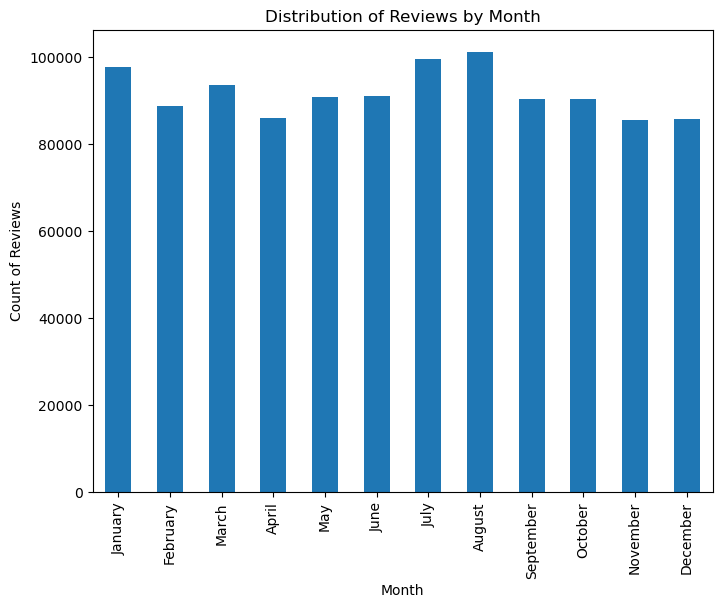

In [ ]:
plt.figure(figsize=(8, 6))
review_raw['review_id'].groupby([review_raw["date"].apply(lambda x: x.month)]).count().plot(kind="bar")
plt.title('Distribution of Reviews by Month')
plt.xlabel('Month')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('Count of Reviews')
plt.show()

### Prepare Users

In [ ]:
# Generator function for filtered users
def load_filtered_users(file_path, user_ids):
    with open(file_path, 'r', encoding='utf-8') as data_file:
        for line in data_file:
            user_info = json.loads(line)
            if user_info['user_id'] in user_ids:
                yield user_info

# Convert the filtered data into a DataFrame
user_raw = pd.DataFrame(load_filtered_users(user_filepath, user_ids))

In [ ]:
user_raw.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,,"piejMEdRkGB7-1aL4lL5NQ, X0zFOU6iG95-feQKOXkgrA...",1,...,0,0,0,0,1,0,2,2,0,0


In [ ]:
user_raw.shape

(312426, 22)

In [ ]:
user_raw.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
user_raw.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000
mean,35.640664,74.937905,31.636826,44.794771,2.623693,3.647673,3.284032,0.498460,0.339431,0.231799,0.126676,2.749682,5.517902,5.129791,5.129791,1.915471,2.248977
std,132.741373,1077.231636,724.201513,953.207991,33.756930,1.081002,114.556309,14.097274,20.181045,9.056863,7.820682,135.420895,222.732963,154.024955,154.024955,49.371450,136.733076
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1.000000,1.000000,0.000000,3.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,18.000000,4.000000,4.000000,1.000000,4.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,4347.000000,7039.000000,2974.000000,2607.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,56104.000000


Cleaning up formatting error in `elite` column:

In [ ]:
user_raw[user_raw['elite'].str.contains("20,20")]['elite'].head(10)

1     2009,2010,2011,2012,2013,2014,2015,2016,2017,2...
7     2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
20    2010,2011,2012,2013,2014,2015,2016,2017,2018,2...
24    2010,2011,2012,2013,2014,2015,2016,2017,2018,2...
25                       2016,2017,2018,2019,20,20,2021
26    2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
33    2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
39    2012,2013,2014,2015,2016,2017,2018,2019,20,20,...
43                            2017,2018,2019,20,20,2021
47    2008,2009,2010,2011,2012,2013,2014,2015,2016,2...
Name: elite, dtype: object

In [ ]:
user_raw['elite'] = user_raw['elite'].apply(lambda x: x.replace("20,20", "2020", 1))

In [ ]:
user_raw[user_raw['elite'].str.contains("2020")]['elite'].head(10)

1     2009,2010,2011,2012,2013,2014,2015,2016,2017,2...
7     2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
20    2010,2011,2012,2013,2014,2015,2016,2017,2018,2...
24    2010,2011,2012,2013,2014,2015,2016,2017,2018,2...
25                        2016,2017,2018,2019,2020,2021
26    2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
33    2006,2007,2008,2009,2010,2011,2012,2013,2014,2...
39    2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
43                             2017,2018,2019,2020,2021
47    2008,2009,2010,2011,2012,2013,2014,2015,2016,2...
Name: elite, dtype: object

In [ ]:
# Step 1: Preprocessing Users Dataset (Data cleaning)

# Convert 'yelping_since' to datetime
user_raw['yelping_since'] = pd.to_datetime(user_raw['yelping_since']).dt.date

# Convert elite to count of years in elite status
user_raw['elite_years'] = user_raw['elite'].apply(lambda x: len(x.split(',')) if x != '' else 0)

# Drop columns not useful initially
user_df_cleaned = user_raw.drop(columns=['friends', 'elite', 'compliment_hot', 'compliment_more',
                                        'compliment_profile', 'compliment_cute', 'compliment_note',
                                        'compliment_list', 'compliment_plain', 'compliment_cool',
                                        'compliment_funny', 'compliment_writer', 'compliment_photos'])

user_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312426 entries, 0 to 312425
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        312426 non-null  object 
 1   name           312426 non-null  object 
 2   review_count   312426 non-null  int64  
 3   yelping_since  312426 non-null  object 
 4   useful         312426 non-null  int64  
 5   funny          312426 non-null  int64  
 6   cool           312426 non-null  int64  
 7   fans           312426 non-null  int64  
 8   average_stars  312426 non-null  float64
 9   elite_years    312426 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 23.8+ MB


In [ ]:
#Check for duplicates
user_df_cleaned.duplicated().sum()

0

In [ ]:
#Check for missing data
user_df_cleaned.isnull().sum()

user_id          0
name             0
review_count     0
yelping_since    0
useful           0
funny            0
cool             0
fans             0
average_stars    0
elite_years      0
dtype: int64

# Exploring User Data

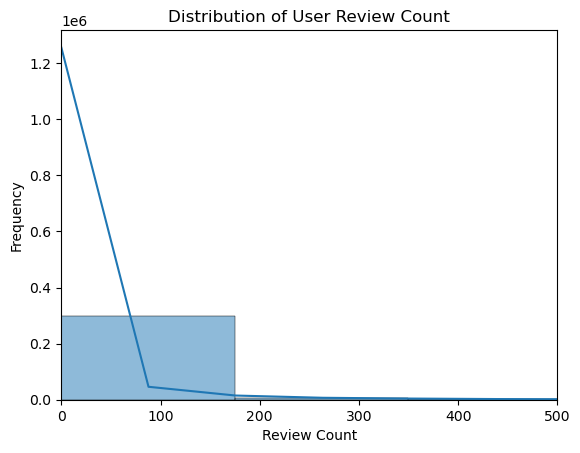

In [ ]:
#Step 2: Basic User EDA

#i. Distribution of review_count
sns.histplot(user_df_cleaned['review_count'], bins=100, kde=True)
plt.title('Distribution of User Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

This plot shows the Distribution of User Review Count from the Yelp dataset.

Interpretation:
1. Highly Skewed Distribution (Right-skewed)

    Most users have very few reviews (close to 0).

    The frequency drops steeply as the review count increases.

    This is typical of user-generated content platforms—a small number of users are very active, while the majority contribute infrequently.

2. Long Tail

    A long tail stretches toward users with 100, 200, or even 400+ reviews.

    These are "power users" who write many reviews and are likely candidates for elite status.

3. Impact on Modeling

    When building recommendation systems:

        Cold-start users (few reviews) are hard to model accurately.

        Power users carry more weight in collaborative filtering but can dominate if not normalized.

4. Outlier Detection

    The small number of users with very high review counts may be outliers.

    These should be investigated (e.g., businesses posing as users, bots, or Yelp Elites).

Next Steps for EDA Based on This:

    Zoom in on users with <10 reviews (majority) vs those with >100 reviews.

    We will also consider log-transforming the review_count for modeling. This smooths the long tail and stabilizes variance — useful for visualization and algorithms sensitive to scale.

    Outlier Removal: Drop users with review_count > 99.5th percentile.

In [ ]:
#Summary of review count percentiles
review_summary_df = user_df_cleaned['review_count'] \
    .describe(percentiles=[.25, .5, .75, .9, .95, .995]) \
    .round(0) \
    .to_frame().T

review_summary_df

,count,mean,std,min,25%,50%,75%,90%,95%,99.5%,max
review_count,312426.0,36.0,133.0,0.0,3.0,7.0,22.0,72.0,152.0,741.0,17473.0


In [ ]:
#Outlier Removal: Drop users with review_count > 99.5th percentile.
# Compute the 99.5th percentile
percentile_995 = user_df_cleaned['review_count'].quantile(0.995)

# Filter users below or equal to the 99.5th percentile
user_df_outliercleaned = user_df_cleaned[user_df_cleaned['review_count'] <= percentile_995]

# Checking the new max
print("New max review_count:", user_df_outliercleaned['review_count'].max())

New max review_count: 741


In [ ]:
#View the cleaned data
user_df_outliercleaned.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,elite_years
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,267,3.91,1
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07,154,20,23,4,3.40,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26,18,3,13,1,4.29,0
5,wrNOKq0hOlz8q1N_YCNXCA,Peter,30,2008-09-30,30,10,12,5,4.33,0
6,65uUyG9yuF0rdMh0z7ajaA,Don,715,2005-11-30,808,258,712,37,3.79,10


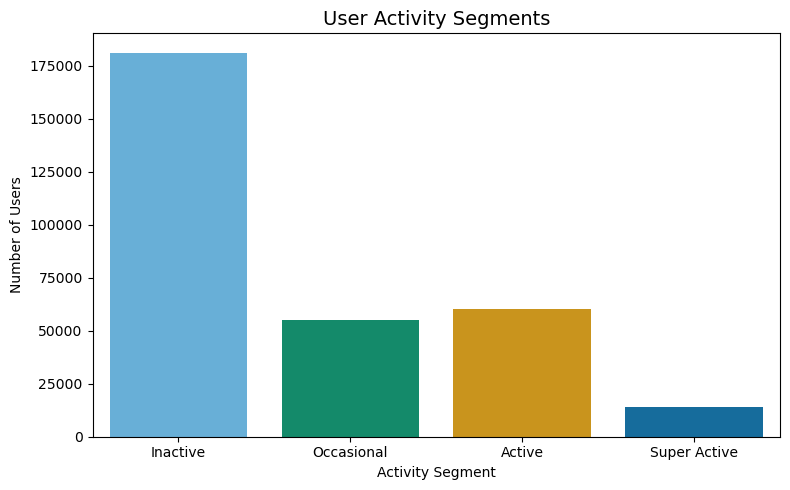

In [ ]:
#Plotting user activity segments
# Removing outliers beyond 99.5th percentile of review_count
threshold = user_df_cleaned['review_count'].quantile(0.995)
user_df_outliercleaned = user_df_cleaned[user_df_cleaned['review_count'] <= threshold].copy()

# Segment user activity
def segment_user_activity(count):
    if count <= 9:
        return 'Inactive'
    elif count <= 22:
        return 'Occasional'
    elif count <= 152:
        return 'Active'
    else:
        return 'Super Active'

user_df_outliercleaned['activity_segment'] = user_df_outliercleaned['review_count'].apply(segment_user_activity)

# Define color palette and segment order
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73']
segment_order = ['Inactive', 'Occasional', 'Active', 'Super Active']

# Plot the user activity segments
plt.figure(figsize=(8, 5))
sns.countplot(
    data=user_df_outliercleaned,
    x='activity_segment',
    hue='activity_segment',
    order=segment_order,
    palette=colors,
    legend=False
)

plt.title('User Activity Segments', fontsize=14)
plt.xlabel('Activity Segment')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

Next Steps:
1. Check the distribution of average_stars by users
2. Analyse the correlation of review_count against average_stars

In [ ]:
#The distribution of average_stars by users
# Summary statistics for 'average_stars' as a DataFrame
average_stars_summary_df = user_df_outliercleaned['average_stars'] \
    .describe() \
    .round(0) \
    .to_frame().T

average_stars_summary_df

,count,mean,std,min,25%,50%,75%,max
average_stars,310867.0,4.0,1.0,1.0,3.0,4.0,4.0,5.0


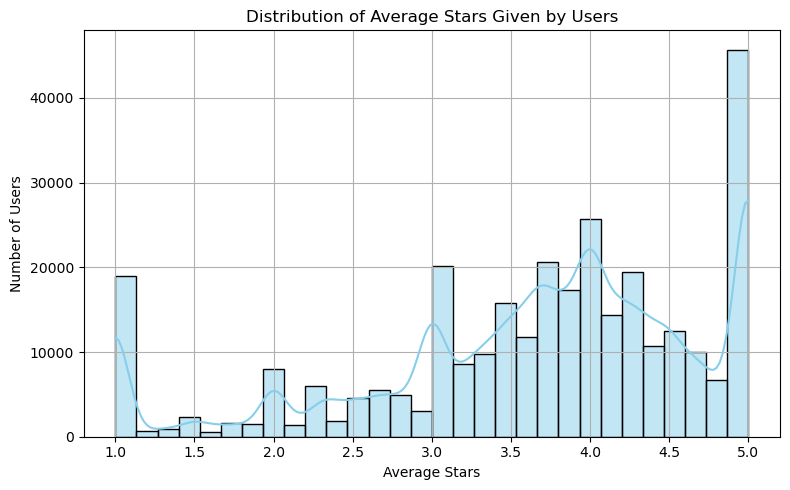

In [ ]:
# Plot the distribution of average stars per user
plt.figure(figsize=(8, 5))
sns.histplot(user_df_outliercleaned['average_stars'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Stars Given by Users')
plt.xlabel('Average Stars')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
user_df_outliercleaned.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,elite_years,activity_segment
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,267,3.91,1,Super Active
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07,154,20,23,4,3.40,0,Active
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26,18,3,13,1,4.29,0,Inactive
5,wrNOKq0hOlz8q1N_YCNXCA,Peter,30,2008-09-30,30,10,12,5,4.33,0,Active
6,65uUyG9yuF0rdMh0z7ajaA,Don,715,2005-11-30,808,258,712,37,3.79,10,Super Active


# Rating Matrix

In [ ]:
# Make sure these variables exist
user_counts = review_raw['user_id'].value_counts()
business_counts = review_raw['business_id'].value_counts()

active_users = user_counts[user_counts >= 5].index
active_restaurants = business_counts[business_counts >= 5].index

filtered_reviews = review_raw[
    review_raw['user_id'].isin(active_users) &
    review_raw['business_id'].isin(active_restaurants)
].copy()

In [ ]:
filtered_reviews.shape

(693137, 9)

In [ ]:
# 1. Create User–Business Rating Matrix
rating_matrix = filtered_reviews.pivot_table(index='user_id', columns='business_id', values='stars')

# 2. Sparsity of Rating Matrix
num_users, num_businesses = rating_matrix.shape
total_possible = num_users * num_businesses
actual_ratings = rating_matrix.count().sum()
sparsity = 1 - (actual_ratings / total_possible)

print(f"Rating matrix shape: {rating_matrix.shape}")
print(f"Sparsity: {sparsity:.2%}")

Rating matrix shape: (44997, 12617)
Sparsity: 99.88%


In [ ]:
rating_matrix.iloc[:3, :3]

business_id,--ZVrH2X2QXBFdCilbirsw,--epgcb7xHGuJ-4PUeSLAw,-0FX23yAacC4bbLaGPvyxw
user_id,,,
--2tyArRmSoyKx5r-FVG0A,NaN,NaN,NaN
--4AjktZiHowEIBCMd4CZA,NaN,NaN,NaN
--6PFZka7og6Khaw6oyjvQ,NaN,NaN,NaN


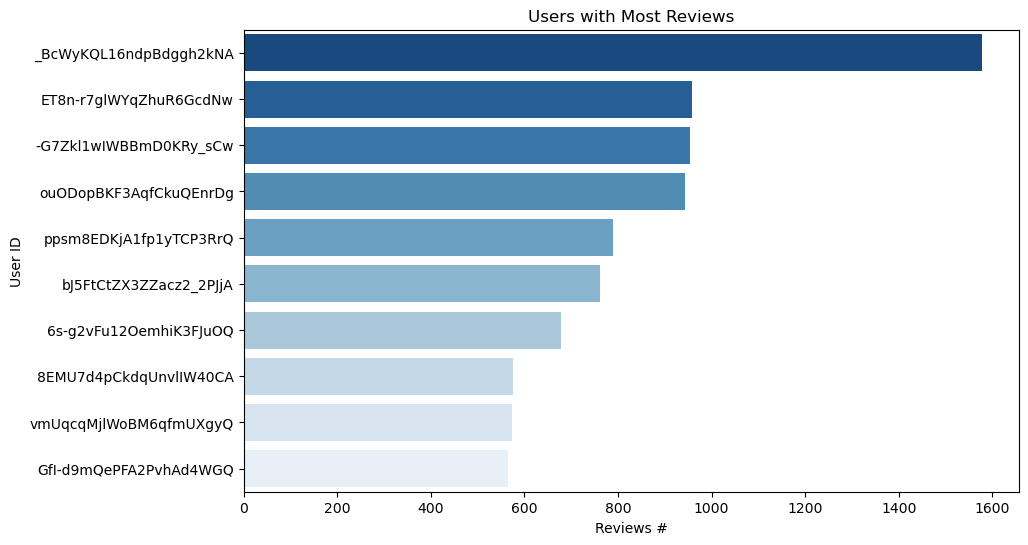

In [ ]:
# top 10 users with most reviews
top_users = filtered_reviews['user_id'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_users.values,
    y=top_users.index,
    hue=top_users.index,
    dodge=False,
    palette='Blues_r',
    legend=False
)
plt.title("Users with Most Reviews")
plt.xlabel("Reviews #")
plt.ylabel("User ID")
plt.show()

/var/folders/sn/3hlc0lb96rl4js6l24nqgprm0000gn/T/ipykernel_22987/3321957621.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_stats['review_count'], y=user_stats['name'], palette='Blues_d')


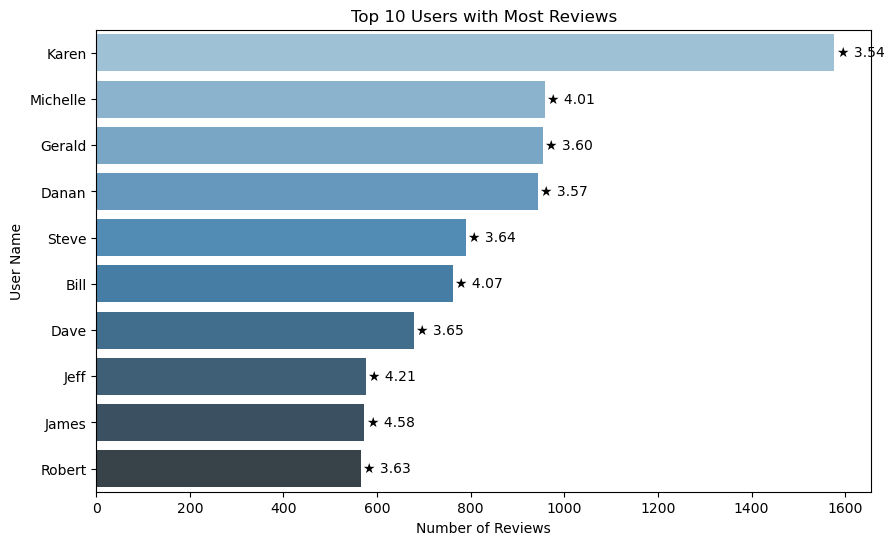

In [ ]:
user_names = user_raw[['user_id', 'name']]
user_stats = filtered_reviews.groupby('user_id').agg(
    review_count=('user_id', 'count'),
    avg_rating=('stars', 'mean')
).reset_index()
user_stats = user_stats.merge(user_names, on='user_id', how='left')
user_stats = user_stats.sort_values(by='review_count', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=user_stats['review_count'], y=user_stats['name'], palette='Blues_d')
for i, v in enumerate(user_stats['avg_rating']):
    plt.text(user_stats['review_count'].iloc[i] + 5, i, f"★ {v:.2f}", va='center')
plt.title('Top 10 Users with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User Name')
plt.show()

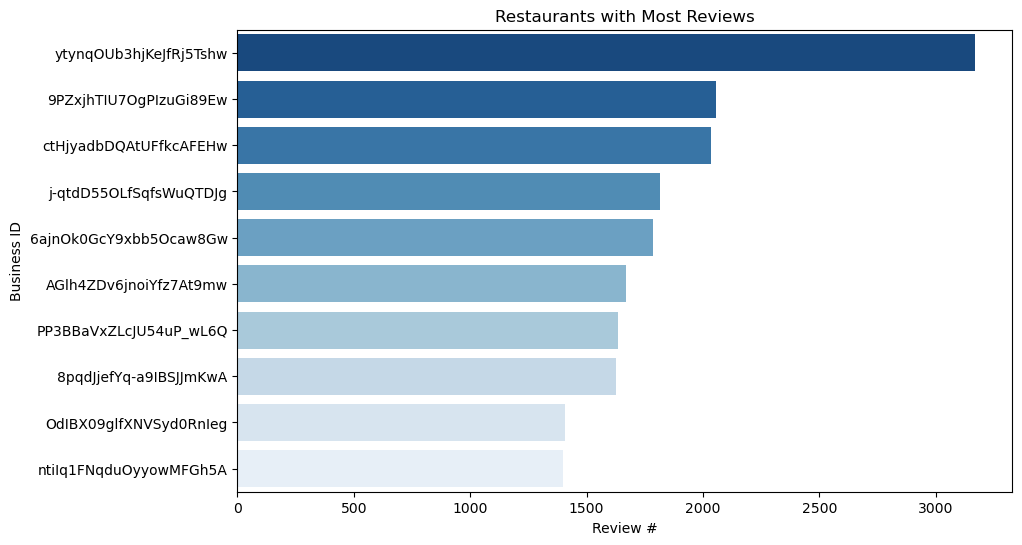

In [ ]:
#top 10 restaurants with most reviews
top_restaurants = filtered_reviews['business_id'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_restaurants.values,
    y=top_restaurants.index,
    hue=top_restaurants.index,
    dodge=False,
    palette='Blues_r',
    legend=False
)
plt.title("Restaurants with Most Reviews")
plt.xlabel("Review #")
plt.ylabel("Business ID")
plt.show()

/var/folders/sn/3hlc0lb96rl4js6l24nqgprm0000gn/T/ipykernel_22987/659229802.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_stats['review_count'], y=restaurant_stats['name'], palette='Blues_d')


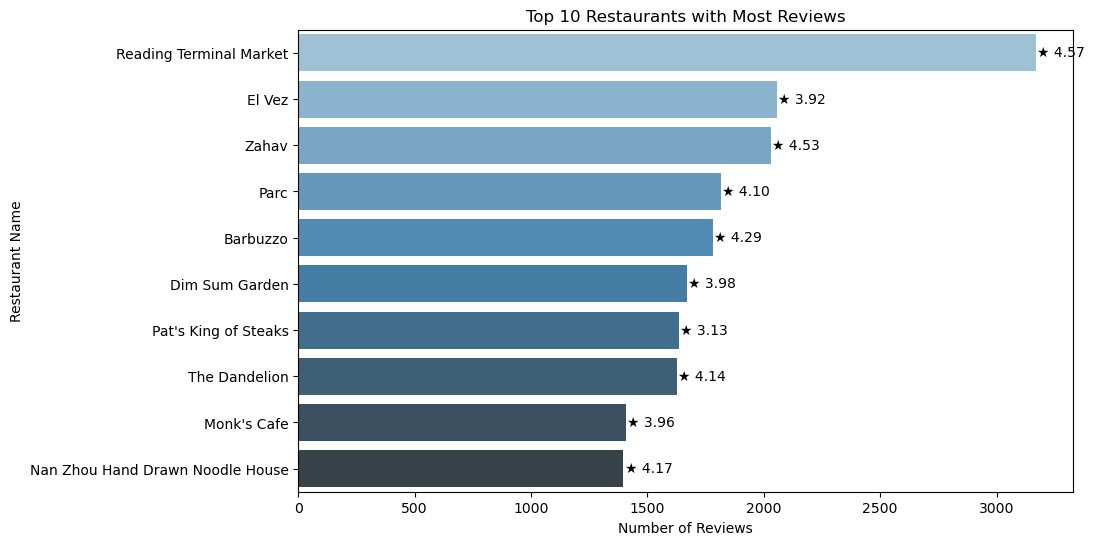

In [ ]:
restaurant_names = business_raw[['business_id', 'name']]
restaurant_stats = filtered_reviews.groupby('business_id').agg(
    review_count=('business_id', 'count'),
    avg_rating=('stars', 'mean')
).reset_index()
restaurant_stats = restaurant_stats.merge(restaurant_names, on='business_id', how='left')
restaurant_stats = restaurant_stats.sort_values(by='review_count', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_stats['review_count'], y=restaurant_stats['name'], palette='Blues_d')
for i, v in enumerate(restaurant_stats['avg_rating']):
    plt.text(restaurant_stats['review_count'].iloc[i] + 5, i, f"★ {v:.2f}", va='center')
plt.title('Top 10 Restaurants with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()

In [ ]:
user_counts = filtered_reviews['user_id'].value_counts()
low_quality_users = user_counts[user_counts < 10]
print(f"Low-quality users (<5 reviews): {len(low_quality_users)}")

Low-quality users (<5 reviews): 26197


In [ ]:
business_counts = filtered_reviews['business_id'].value_counts()
low_quality_restaurants = business_counts[business_counts < 10]
print(f"Low-quality restaurants (<5 reviews): {len(low_quality_restaurants)}")

Low-quality restaurants (<5 reviews): 3493


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import mean_squared_error, mean_absolute_error


RATINGS_DF = filtered_reviews[['user_id','business_id','stars']].dropna().copy()
RATINGS_DF['stars'] = RATINGS_DF['stars'].astype(float)

print(f"Total ratings: {len(RATINGS_DF):,} | Users: {RATINGS_DF['user_id'].nunique():,} | Businesses: {RATINGS_DF['business_id'].nunique():,}")


Total ratings: 693,137 | Users: 44,997 | Businesses: 12,617


In [ ]:
# train/test split (80/20)
rng = np.random.default_rng(42)

def split_user_group(g):
    if len(g) == 1:
        g = g.copy()
        g['split'] = 'train'
        return g
    n_test = max(1, int(round(0.2 * len(g))))
    test_idx = rng.choice(g.index, size=n_test, replace=False)
    g = g.copy()
    g['split'] = 'train'
    g.loc[test_idx, 'split'] = 'test'
    return g

split_df = RATINGS_DF.groupby('user_id', group_keys=False).apply(split_user_group)
train = split_df[split_df['split']=='train'].drop(columns='split').reset_index(drop=True)
test  = split_df[split_df['split']=='test'].drop(columns='split').reset_index(drop=True)

print(f"Train: {len(train):,} | Test: {len(test):,} | Users: {train['user_id'].nunique():,} | Businesses: {train['business_id'].nunique():,}")


/var/folders/sn/3hlc0lb96rl4js6l24nqgprm0000gn/T/ipykernel_22987/2317239064.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  split_df = RATINGS_DF.groupby('user_id', group_keys=False).apply(split_user_group)


Train: 556,156 | Test: 136,981 | Users: 44,997 | Businesses: 12,591


In [ ]:
#UTILITY MATRIX
R = train.pivot_table(index='user_id', columns='business_id', values='stars', aggfunc='mean')

user_index = R.index
item_index = R.columns
user_means = R.mean(axis=1)

# user -> {business: rating}
user_item_ratings = {u: row.dropna().to_dict() for u, row in R.iterrows()}

# item -> {business: rating}
item_user_ratings = defaultdict(dict)
for u, row in R.iterrows():
    for i, r in row.dropna().items():
        item_user_ratings[i][u] = r

global_mean = train['stars'].mean()

print(f"Utility matrix: {R.shape} | Global mean: {global_mean:.3f}")


Utility matrix: (44997, 12591) | Global mean: 3.788


In [ ]:
# user-user similarity
def overlap_cosine(u1_dict, u2_dict, shrinkage=10, min_overlap=2):
    common = set(u1_dict).intersection(u2_dict)
    n = len(common)
    if n < min_overlap:
        return 0.0, 0
    u1 = np.array([u1_dict[i] for i in common])
    u2 = np.array([u2_dict[i] for i in common])
    u1c = u1 - u1.mean()
    u2c = u2 - u2.mean()
    num = float((u1c * u2c).sum())
    den = float(np.linalg.norm(u1c) * np.linalg.norm(u2c))
    if den == 0:
        return 0.0, n
    raw = num / den
    sim = (n / (n + shrinkage)) * raw  # shrink small overlaps
    return sim, n

In [ ]:
# prediction
def predict_user_item(u, i, k=30, shrinkage=10, min_overlap=2):
    if u not in user_item_ratings:

        if i in item_user_ratings and len(item_user_ratings[i]) > 0:
            return float(np.mean(list(item_user_ratings[i].values())))
        return global_mean
    if i not in item_user_ratings:

        return user_means.get(u, global_mean)

    sims = []
    for v in item_user_ratings[i].keys():
        if v == u:
            continue
        sim, _ = overlap_cosine(user_item_ratings[u], user_item_ratings[v],
                                shrinkage=shrinkage, min_overlap=min_overlap)
        if sim != 0.0:
            sims.append((v, sim))

    if not sims:
        return user_means.get(u, global_mean)

    sims.sort(key=lambda t: abs(t[1]), reverse=True)
    top = sims[:k]

    num = 0.0
    den = 0.0
    for v, s in top:
        rv = user_item_ratings[v].get(i, None)
        if rv is None:
            continue
        mv = np.mean(list(user_item_ratings[v].values()))
        num += s * (rv - mv)
        den += abs(s)
    if den == 0:
        return user_means.get(u, global_mean)

    mu_u = user_means.get(u, global_mean)
    pred = mu_u + (num / den)
    return float(np.clip(pred, 1.0, 5.0))


In [ ]:
#EVALUATION
y_true, y_pred = [], []

for row in test.itertuples(index=False):
    u, i, r = row.user_id, row.business_id, row.stars
    y_true.append(r)
    y_pred.append(predict_user_item(u, i, k=30, shrinkage=10, min_overlap=2))

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae  = mean_absolute_error(y_true, y_pred)

print("User-based CF  |  k=30, shrinkage=10, min_overlap=2")
print(f"RMSE: {rmse:.4f}   MAE: {mae:.4f}   (n={len(test):,} test ratings)")


User-based CF  |  k=30, shrinkage=10, min_overlap=2
RMSE: 1.2239   MAE: 0.9368   (n=136,981 test ratings)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#TOP RECOMMENDATIONS
def recommend_for_user(u, N=10, k=30, shrinkage=10, min_overlap=2):
    seen = set(user_item_ratings.get(u, {}).keys())
    candidates = [i for i in item_index if i not in seen]
    if not candidates:
        return pd.DataFrame(columns=['business_id','predicted_stars'])
    preds = [(i, predict_user_item(u, i, k=k, shrinkage=shrinkage, min_overlap=min_overlap))
             for i in candidates]
    preds.sort(key=lambda t: t[1], reverse=True)
    df = pd.DataFrame(preds[:N], columns=['business_id','predicted_stars'])
    return df

if len(user_index) > 0:
    sample_user = user_index[0]
    recs = recommend_for_user(sample_user, N=10)


    if 'restaurants' in globals() and {'business_id','name'}.issubset(restaurants.columns):
        cols = ['business_id','name']
        if 'city' in restaurants.columns: cols.append('city')
        if 'categories' in restaurants.columns: cols.append('categories')
        recs_named = recs.merge(restaurants[cols].drop_duplicates('business_id'), on='business_id', how='left')
        display(recs_named)
    else:
        display(recs)


,business_id,predicted_stars,name,city,categories
0,-wlmZ-b35UJ-GY-59NDxyw,5.0,H Mart - Elkins Park,Elkins Park,"[Food, Pan Asian, Grocery, Korean, Seafood Mar..."
1,0Ae7F98kmeA01VJCIdD8vw,5.0,Suppa,Philadelphia,"[American (New), Restaurants]"
2,2EmAukTYm2mOBEIKEYBRNg,5.0,Nick's Bar and Grille,Philadelphia,"[American (Traditional), Sandwiches, Restauran..."
3,3eJMsl41qwhcYlvoTF1ElQ,5.0,a.kitchen,Philadelphia,"[Food, Breakfast & Brunch, Modern European, Re..."
4,3eekdvX6Vep9yO0TLaiBxg,5.0,Sofie's Steaks,Morton,"[Sandwiches, Steakhouses, Restaurants]"
5,45CvrxmM8rBwuV2iWHjZ_w,5.0,South View Pizza,Philadelphia,"[Sandwiches, Pizza, Salad, Seafood, Restaurants]"
6,5x0Qrz93x4msXr29NNRCkA,5.0,Chili Szechuan,Philadelphia,"[Restaurants, Szechuan, Chinese]"
7,69ke4OmxhjG6-7L_rhc-mQ,5.0,Little John's Pizza,Philadelphia,"[Event Planning & Services, Caterers, Restaura..."
8,9ANZAxxwp-UAxqUo3KF9gg,5.0,Hiroki,Philadelphia,"[Japanese, Sushi Bars, Restaurants]"
9,9PCiyXCG25bOycCR7nXIDw,5.0,Santucci's Original Square Pizza,Philadelphia,"[Italian, Bars, Nightlife, Pizza, Breakfast & ..."


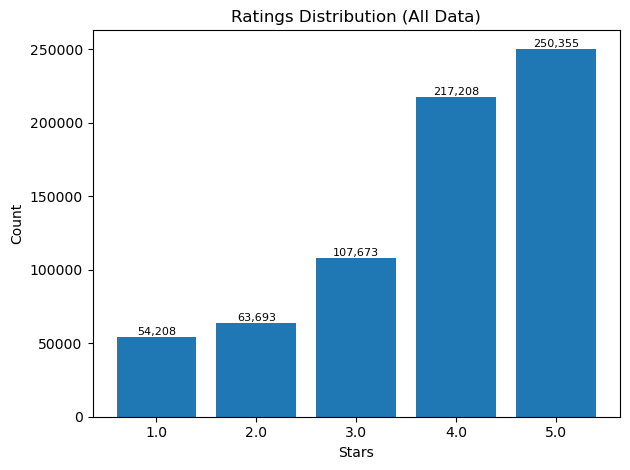

In [ ]:
# ratings distribution

import matplotlib.pyplot as plt
import numpy as np
stars = RATINGS_DF['stars'].astype(float)

fig = plt.figure()
counts = stars.value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Ratings Distribution (All Data)")
plt.xlabel("Stars")
plt.ylabel("Count")
for x, y in zip(counts.index.astype(str), counts.values):
    plt.text(x, y, f"{y:,}", ha="center", va="bottom", fontsize=8, rotation=0)
plt.tight_layout()
plt.show()


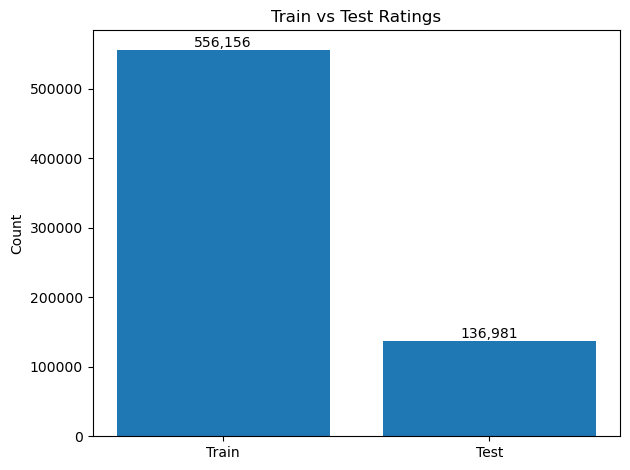

In [ ]:
# train vs test counts
import matplotlib.pyplot as plt

fig = plt.figure()
labels = ["Train", "Test"]
values = [len(train), len(test)]
plt.bar(labels, values)
plt.title("Train vs Test Ratings")
plt.ylabel("Count")
for x, y in zip(labels, values):
    plt.text(x, y, f"{y:,}", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()


Utility matrix: (44997, 12591)  |  Filled: 533,802  |  Sparsity: 99.91%


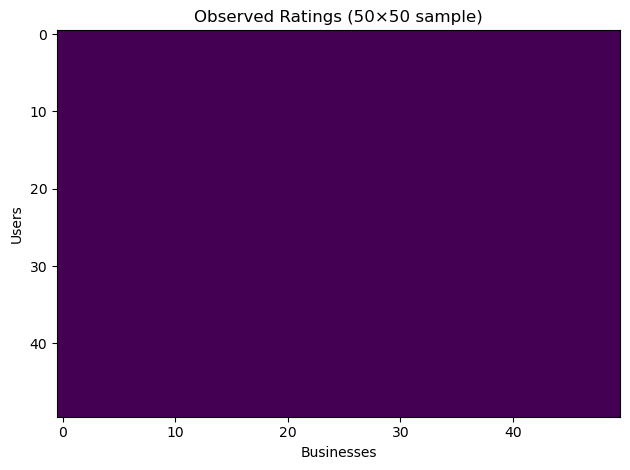

In [ ]:
# utility matrix and sparsity

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_users, num_items = R.shape
filled = R.count().sum()
sparsity = 1 - (filled / (num_users * num_items))
print(f"Utility matrix: {R.shape}  |  Filled: {int(filled):,}  |  Sparsity: {sparsity:.2%}")

u_sample = R.index[:50]
i_sample = R.columns[:50]
observed = ~R.loc[u_sample, i_sample].isna()

fig = plt.figure()
plt.imshow(observed.values, aspect="auto")
plt.title("Observed Ratings (50×50 sample)")
plt.xlabel("Businesses")
plt.ylabel("Users")
plt.tight_layout()
plt.show()


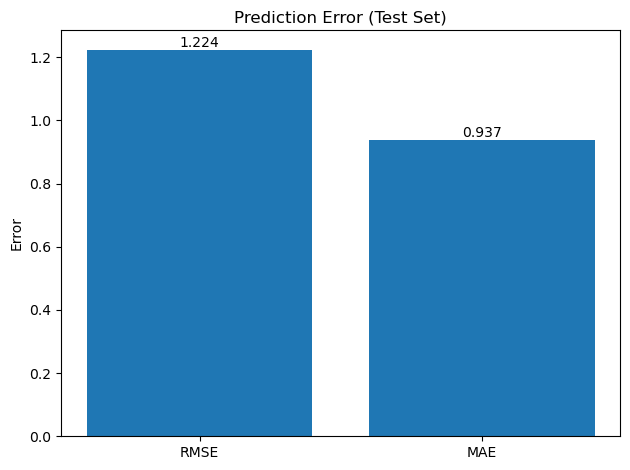

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
metrics = ["RMSE", "MAE"]
values = [rmse, mae]
plt.bar(metrics, values)
plt.title("Prediction Error (Test Set)")
plt.ylabel("Error")
for x, y in zip(metrics, values):
    plt.text(x, y, f"{y:.3f}", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()
